# MPOCryptoML 데이터 탐색 및 전처리

이 노트북은 캐글에서 다운로드한 데이터를 탐색하고 전처리하는 용도입니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 현재 디렉토리 설정
import sys
sys.path.append('../src')
from preprocess import DataPreprocessor


In [2]:
import opendatasets as od

# 이더리움 사기 탐지 데이터셋 다운로드
dataset_url = "https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset"
od.download(dataset_url)

print("Download complete! Check the 'data' folder.")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset


100%|██████████| 923k/923k [00:00<00:00, 426MB/s]


Download complete! Check the 'data' folder.


In [6]:
# 데이터 경로 찾기
data_path = Path('./ethereum-frauddetection-dataset')
print(list(data_path.iterdir()))  # 어떤 파일들이 있는지 확인

# CSV 파일 읽기
df = pd.read_csv('./ethereum-frauddetection-dataset/transaction_dataset.csv')


[PosixPath('ethereum-frauddetection-dataset/transaction_dataset.csv')]


## 2. 데이터 탐색


In [8]:
print(df.shape)
df.head()

(9841, 51)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [10]:
# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# FLAG와 인덱스 관련 컬럼 제외
numeric_cols = [col for col in numeric_cols if col not in ['FLAG', 'Index', 'Unnamed: 0']]

print(f"Total numeric features: {len(numeric_cols)}")
print("\n=== Basic Statistics for Numeric Features ===")
print(df[numeric_cols].describe().T.head(20))


Total numeric features: 45

=== Basic Statistics for Numeric Features ===
                                                     count           mean  \
Avg min between sent tnx                            9841.0    5086.878721   
Avg min between received tnx                        9841.0    8004.851184   
Time Diff between first and last (Mins)             9841.0  218333.257652   
Sent tnx                                            9841.0     115.931714   
Received Tnx                                        9841.0     163.700945   
Number of Created Contracts                         9841.0       3.729702   
Unique Received From Addresses                      9841.0      30.360939   
Unique Sent To Addresses                            9841.0      25.840159   
min value received                                  9841.0      43.845153   
max value received                                  9841.0     523.152481   
avg val received                                    9841.0     100.711721   
mi

In [11]:
# FLAG와 각 특징 간 상관관계 (Top 20)
print("=== Top Features Correlated with FLAG ===\n")
correlations = df[numeric_cols + ['FLAG']].corr()['FLAG'].sort_values(ascending=False)
print(correlations.head(20))


=== Top Features Correlated with FLAG ===

FLAG                                1.000000
 ERC20 min val sent                 0.025364
 ERC20 avg val sent                 0.025044
 ERC20 max val sent                 0.025038
 ERC20 total ether sent             0.024762
 ERC20 total Ether sent contract    0.013514
 ERC20 min val rec                  0.011163
 ERC20 uniq sent token name         0.009249
 ERC20 avg val rec                  0.007881
min val sent                        0.006626
 ERC20 uniq sent addr.1            -0.003047
total ether balance                -0.003229
 ERC20 max val rec                 -0.004313
 ERC20 total Ether received        -0.004475
min value sent to contract         -0.007213
max val sent to contract           -0.007988
total ether sent contracts         -0.007988
avg value sent to contract         -0.008883
avg val received                   -0.011881
Number of Created Contracts        -0.013711
Name: FLAG, dtype: float64


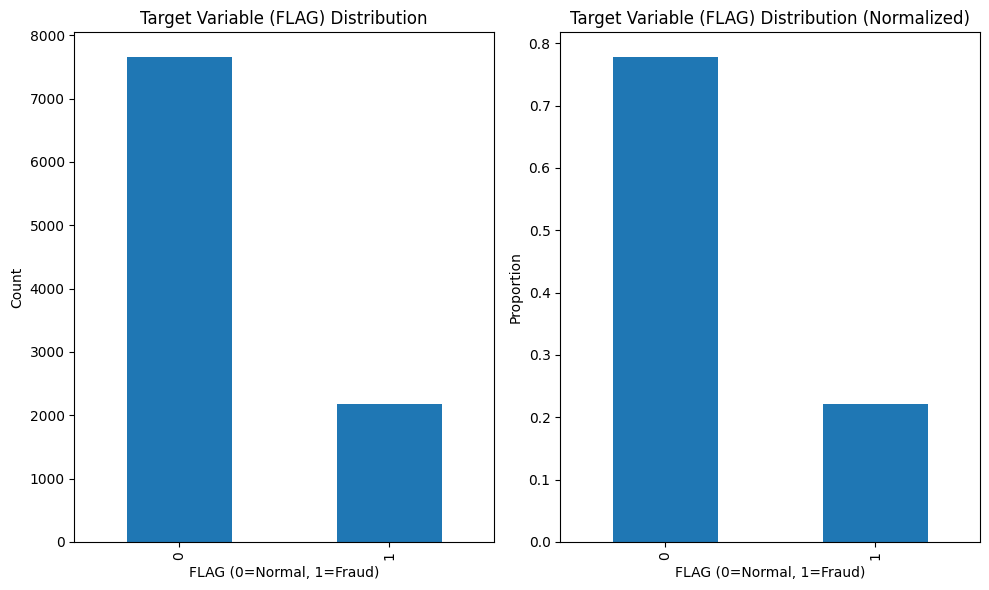

In [12]:
# 3. 시각화
# 타겟 변수 분포
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 2, 1)
df['FLAG'].value_counts().plot(kind='bar', ax=ax)
plt.title('Target Variable (FLAG) Distribution')
plt.xlabel('FLAG (0=Normal, 1=Fraud)')
plt.ylabel('Count')

ax = plt.subplot(1, 2, 2)
df['FLAG'].value_counts(normalize=True).plot(kind='bar', ax=ax)
plt.title('Target Variable (FLAG) Distribution (Normalized)')
plt.xlabel('FLAG (0=Normal, 1=Fraud)')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


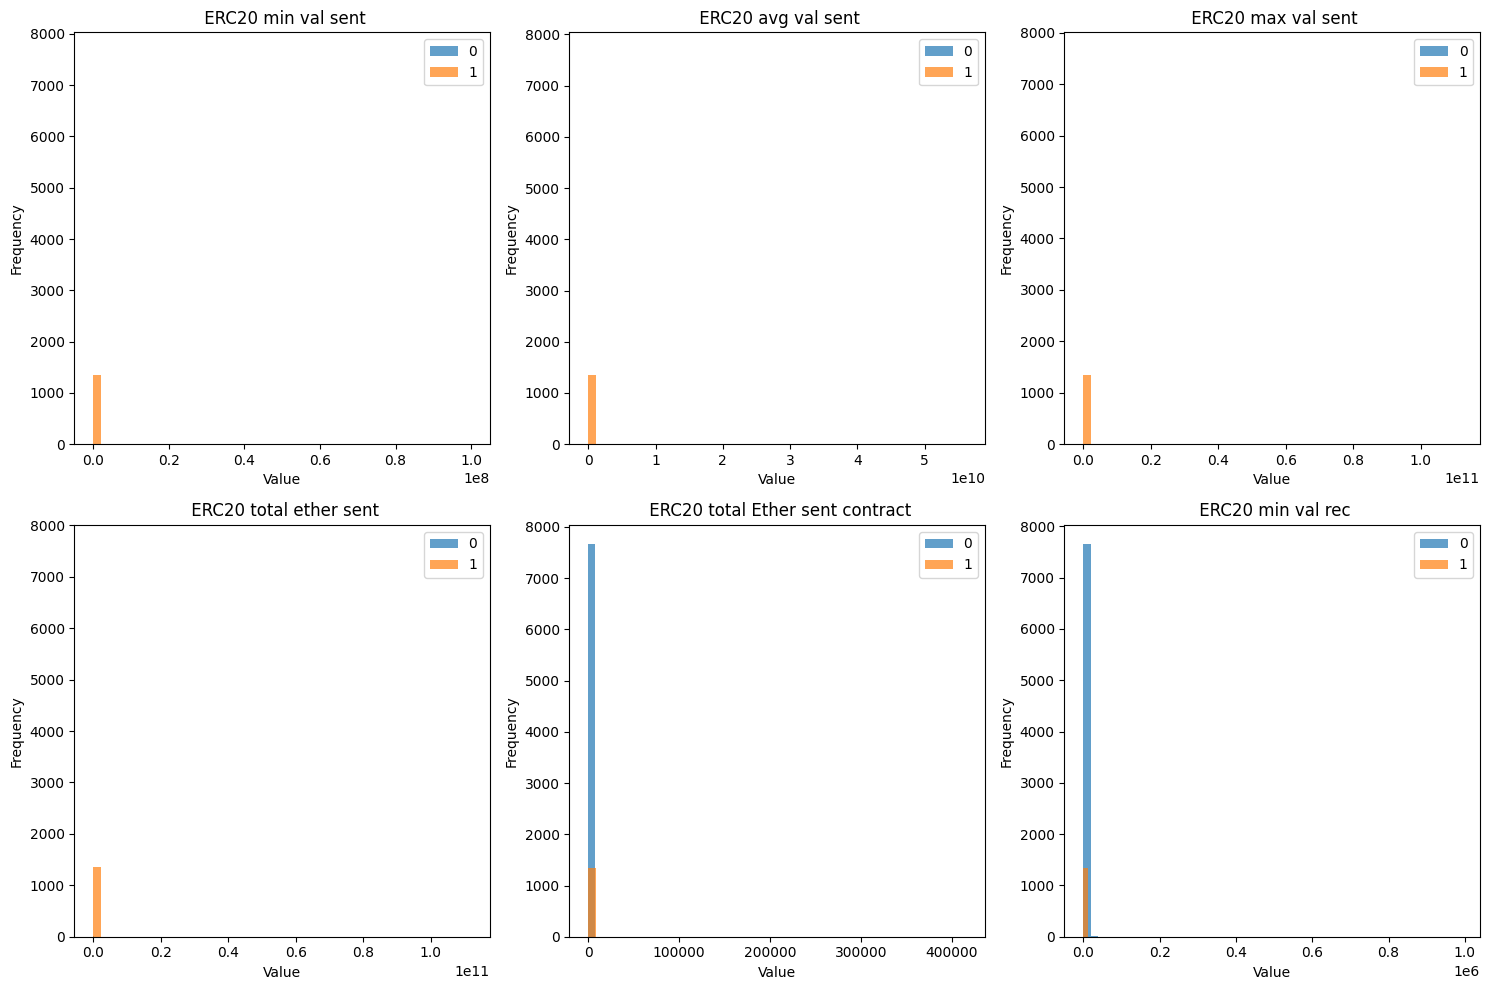

In [13]:
# 주요 특징들의 분포 비교 (사기 vs 정상)
top_features = correlations.head(10).index.tolist()
if 'FLAG' in top_features:
    top_features.remove('FLAG')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features[:6]):
    df.groupby('FLAG')[feature].plot(kind='hist', ax=axes[i], alpha=0.7, bins=50, legend=True)
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


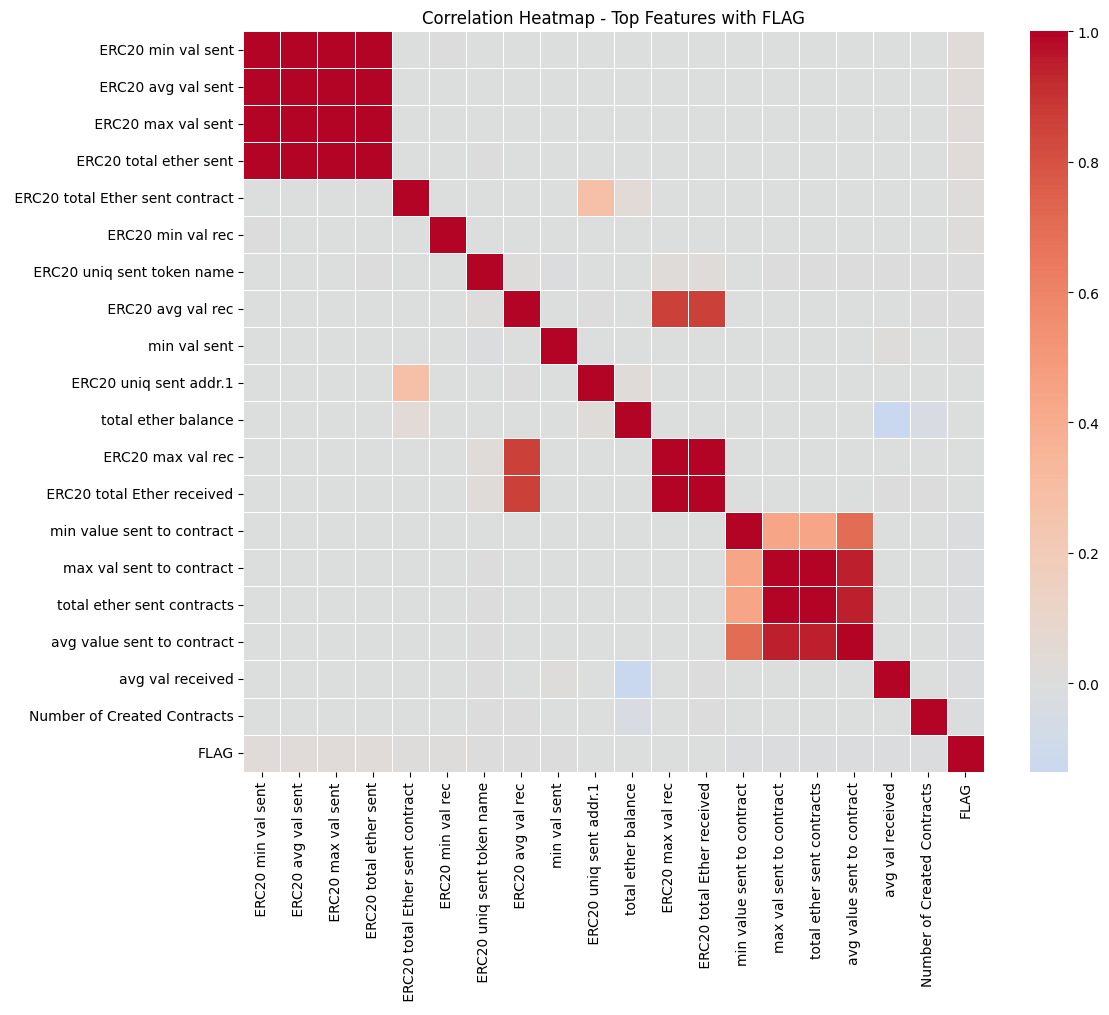

In [14]:
# 상관관계 히트맵 (Top 20 features)
top_features = correlations.head(20).index.tolist()
if 'FLAG' in top_features:
    top_features.remove('FLAG')

plt.figure(figsize=(12, 10))
corr_matrix = df[top_features + ['FLAG']].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap - Top Features with FLAG')
plt.tight_layout()
plt.show()


## 4. 데이터 탐색 결론

**중요 발견사항:**
1. 타임스탬프 정보 없음: 원본 트랜잭션의 실제 발생 시점을 알 수 없음
2. 집계된 데이터: 이미 특징 추출이 완료된 데이터셋
3. FLAG 변수가 타겟: 사기(1) vs 정상(0) 분류 문제

**다음 단계:**
- 현재 데이터로 머신러닝 모델 구축 가능
- 시간 기반 분석은 불가능 (이미 집계된 시간 통계만 사용 가능)
- 분류 모델로 사기 탐지 구현
